In [1]:
from __future__ import print_function, division
import numpy as np
from utils import calculate_covariance_matrix, normalize, standardize

class LDA():
    """The Linear Discriminant Analysis classifier, also known as Fisher's linear discriminant.
    Can besides from classification also be used to reduce the dimensionaly of the dataset.
    """
    def __init__(self):
        self.w = None

    def transform(self, X, y):
        self.fit(X, y)
        # Project data onto vector
        X_transform = X.dot(self.w)
        return X_transform

    def fit(self, X, y):
        # Separate data by class
        X1 = X[y == 0]
        X2 = X[y == 1]

        # Calculate the covariance matrices of the two datasets
        cov1 = calculate_covariance_matrix(X1)
        cov2 = calculate_covariance_matrix(X2)
        cov_tot = cov1 + cov2

        # Calculate the mean of the two datasets
        mean1 = X1.mean(0)
        mean2 = X2.mean(0)
        mean_diff = np.atleast_1d(mean1 - mean2)

        # Determine the vector which when X is projected onto it best separates the
        # data by class. w = (mean1 - mean2) / (cov1 + cov2)
        self.w = np.linalg.pinv(cov_tot).dot(mean_diff)

    def predict(self, X):
        y_pred = []
        for sample in X:
            h = sample.dot(self.w)
            y = 1 * (h < 0)
            y_pred.append(y)
        return y_pred


Accuracy: 1.0


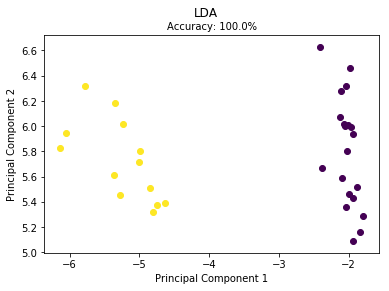

In [4]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

from utils import calculate_covariance_matrix, accuracy_score
from utils import normalize, standardize, train_test_split, Plot

def main():
    # Load the dataset
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Three -> two classes
    X = X[y != 2]
    y = y[y != 2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Fit and predict using LDA
    lda = LDA()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)

    Plot().plot_in_2d(X_test, y_pred, title="LDA", accuracy=accuracy)

if __name__ == "__main__":
    main()
